<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dot-product" data-toc-modified-id="Dot-product-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dot product</a></span></li><li><span><a href="#Figure-10.2" data-toc-modified-id="Figure-10.2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 10.2</a></span></li><li><span><a href="#Figure-10.4" data-toc-modified-id="Figure-10.4-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 10.4</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 10
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Dot product

In [3]:
#2 vectors of random numbers
a = np.random.randn(10)
b = np.random.randn(10)

#initialize temporary matrix
pointwise_result = np.zeros(len(a))

for ii in range(len(a)):
    pointwise_result[ii] = a[ii] * b[ii]
    
print(np.sum(pointwise_result))

# The above code is useful if you are unfamiliar with 
# how a dot product works. Following is a bit more elegant: 
print(np.sum(a*b))

# You have numpy, so you need just:
print(np.dot(a,b))

-2.865502212697396
-2.865502212697396
-2.865502212697396


## Figure 10.2

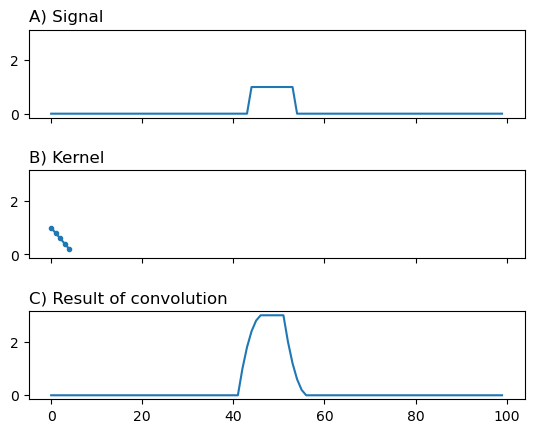

In [4]:
# impulse function (all zeros; 1 in the middle)
impfun = np.zeros(100)
impfun[49] = 1
# the figure in the book actually uses the following line, which creates a
# wider boxcar function rather than strictly an impulse function.
impfun[44:54] = 1

kernel = np.array([1, 0.8, 0.6, 0.4, 0.2])

# python & numpy convolution function
numpy_conv_result = np.convolve(impfun, kernel, mode="same")

fig, ax = plt.subplots(3, 1, sharex='all', sharey='all')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
# plot the signal (impulse or boxcar)

#plot signal
ax[0].plot(impfun)
ax[0].set_title('A) Signal', loc='left')

#plot kernel
ax[1].plot(kernel,'.-')
ax[1].set_title('B) Kernel', loc='left')

#plot result of convolution
ax[2].plot(numpy_conv_result)
_=ax[2].set_title('C) Result of convolution', loc='left')

## Figure 10.4

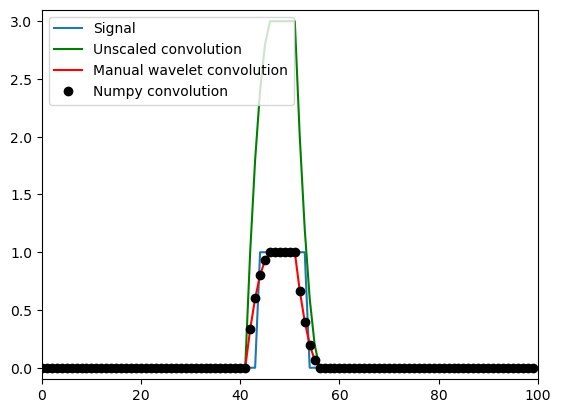

In [6]:
# data that we'll use for convolution (must be zero-padded).
zz = np.zeros(len(kernel)-1)
dat4conv = np.concatenate([zz, impfun, zz])

# used for cutting the result of convolution
half_of_kernel_size = int(np.ceil((len(kernel) -1) /2))

# initialize convolution output
convolution_result = np.zeros(len(impfun)+len(kernel) -1)

# run convolution (note that kernel is flipped backwards)
for ti in range(len(convolution_result) - half_of_kernel_size):
    convolution_result[ti] = np.sum(dat4conv[ti:ti+len(kernel)]*kernel[::-1])

# cut off edges
convolution_result = convolution_result[half_of_kernel_size:-half_of_kernel_size]
# Note: In the book figure there was a bug on the previous line ("+1" was typed 
#       as "-1"), which incorrectly showed the convolution as being a few points
#       too far to the right. Thanks to Thijs Perenboom for catching that!

plt.figure()
plt.plot(impfun)
plt.plot(convolution_result, 'g')
plt.plot(convolution_result/np.sum(kernel), 'r')
plt.plot(numpy_conv_result/np.sum(kernel), 'ko')
plt.axis([0, 100, -0.1, 3.1])
_=plt.legend(["Signal","Unscaled convolution","Manual wavelet convolution","Numpy convolution"],
           loc='upper left')